#  Relative-entropy

Given $(0 < \lambda < 1)$, and $r > 0$ define:

$$
V_{\lambda,r} = \begin{bmatrix} (1-\lambda) + \lambda e^{-2r} & 0 \\ 0 & (1-\lambda) + \lambda e^{2r} \end{bmatrix}
$$

Now for $\alpha = \begin{bmatrix} x \\ y \end{bmatrix} \in \mathbb{R}^2 $, define:

$$
\delta(\lambda_1,\lambda_2, \alpha) = (\sqrt{\lambda_1} - \sqrt{\lambda_2}) \alpha
$$

Define:

$$
G_{\lambda} = 2iJ \coth^{-1}(2V_{\lambda}iJ),
$$

where:

$$
J = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}.
$$

Then define:

$$
\Sigma\left(V_{\lambda_1,r}, V_{\lambda_2,r}, \delta\right) = \frac{\ln \operatorname{det}\left(V_{\lambda_2,r}+\frac{i}{2}J\right) + \operatorname{Tr}\left(V_{\lambda_1,r} G_{\lambda_2}\right) + \delta(\lambda_1,\lambda_2, \alpha)^T G_{\lambda_2} \delta(\lambda_1,\lambda_2, \alpha)}{2 \ln 2}.
$$

We can then define:

$$
S(\lambda_1,\lambda_2, r) = -\Sigma(V_{\lambda_1,r}, V_{\lambda_1,r},0) + \Sigma(V_{\lambda_1,r}, V_{\lambda_2,r},\delta(\lambda_1,\lambda_2, \alpha))
$$

We need to evaluate this expression and plot the graph when $\lambda_1$ and $\lambda_2$ vary in $(0,1)$.


## Define the matrices $(V_{\lambda_1,r}) and (V_{\lambda_2,r})$:

In [1]:
import numpy as np
def V(lambda_val, r):
    matrix = np.array([[(1 - lambda_val) + lambda_val * np.exp(-2 * r), 0],
                       [0, (1 - lambda_val) + lambda_val * np.exp(2 * r)]])
    return matrix


## Define the function $\delta(\lambda_1,\lambda_2, \alpha)$:

In [4]:
x = 2
y = 0
alpha = np.array([x, y])

def delta(lambda_1, lambda_2, alpha):
    #print (alpha)
    return (np.sqrt(lambda_1) - np.sqrt(lambda_2)) * alpha
print(np.sqrt(0.3))
print(np.sqrt(0.6))   
delta(0.3, 0.6, alpha)

0.5477225575051661
0.7745966692414834


array([-0.45374822, -0.        ])

## Define the function $G_\lambda$

In [5]:
# Define the function G_lambda
import numpy as np
def acoth(x):
    return 0.5 * np.log((x + 1) / (x - 1))
    
def G(lambda_val):
    J = np.array([[0, 1], [-1, 0]])
    V_lambda = V(lambda_val, r)  # Assuming r = 1
    G_val = 2j * J * acoth(2 * V_lambda * 1j * J)
    return G_val

## Define the function $\Sigma(V1, V2, \delta)$

In [6]:

def Sigma(V1, V2, delta):
    J = np.array([[0, 1], [-1, 0]])
    term1 = np.log(np.linalg.det(V2 + 1j*J/2))
    term2 = np.trace(V1 @ G(2))
    term3 = delta.T @ G(2) @ delta
    result = (term1 + term2 + term3) / (2 * np.log(2))
    return result.real

## Define the function $S(\lambda_1, \lambda_2, r)$

In [7]:
def S(lambda_1, lambda_2, r):
    V1 = V(lambda_1, r)
    V2 = V(lambda_2, r)
    alpha = np.array([x, y])  # Assuming alpha as [0, 0]
    # # Create alpha as a column vector
    # alpha = np.array([[x], [y]])
    # #alpha
    delta_val = delta(lambda_1, lambda_2, alpha)
    result = -Sigma(V1, V1, np.array([0, 0])) + Sigma(V1, V2, delta_val)
    return result


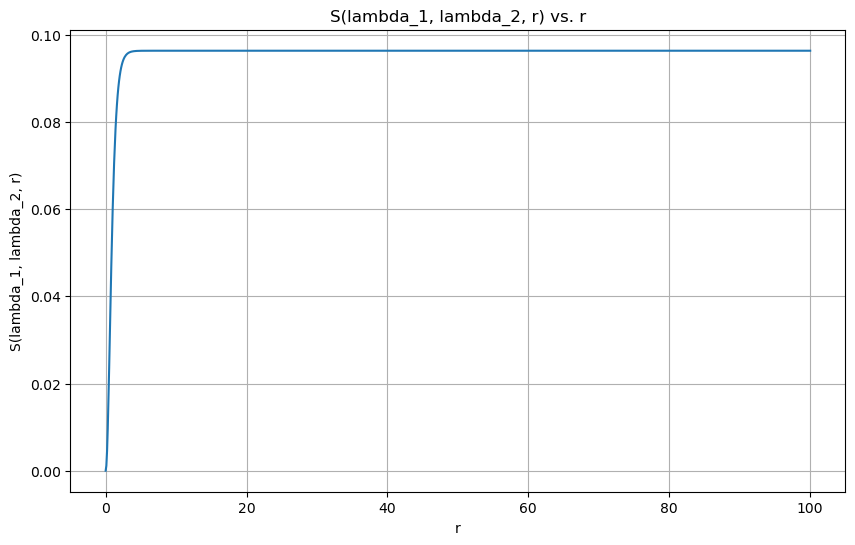

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Fixed lambda values
lambda_1 = 0.3
lambda_2 = 0.6
r = 0.5
x = 2
y = 0
r_val = np.linspace(0, 100, 1000)
# Calculate S for each r value
s_vals = [S(lambda_1, lambda_2, r) for r in r_val]

# Plot S vs. r
plt.figure(figsize=(10, 6))
plt.plot(r_val, s_vals)
plt.xlabel('r')
plt.ylabel('S(lambda_1, lambda_2, r)')
plt.title('S(lambda_1, lambda_2, r) vs. r')
plt.grid(True)
# Set logarithmic scale for both axes
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('S_vals_r.pdf')
plt.show()

### Plotting

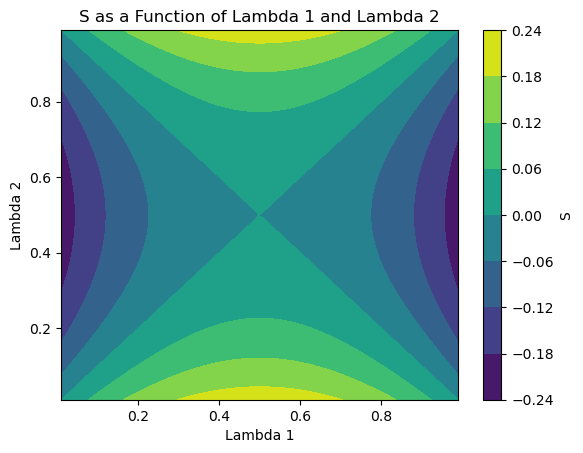

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Generate values for lambda_1 and lambda_2
lambda_vals = np.linspace(0.01, 0.99, 100)
r_val = 0.5  # Choose an appropriate value for r

# Calculate S(lambda_1, lambda_2, r) for each pair
S_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
for i, lambda_1 in enumerate(lambda_vals):
    for j, lambda_2 in enumerate(lambda_vals):
        S_vals[i, j] = S(lambda_1, lambda_2, r_val)

# Plotting
X, Y = np.meshgrid(lambda_vals, lambda_vals)
plt.contourf(X, Y, S_vals, cmap='viridis')
plt.colorbar(label='S')
plt.xlabel('Lambda 1')
plt.ylabel('Lambda 2')
plt.title('S as a Function of Lambda 1 and Lambda 2')
plt.show()


## 3D Surface Plot for $S(\lambda_1, \lambda_2, r)$:

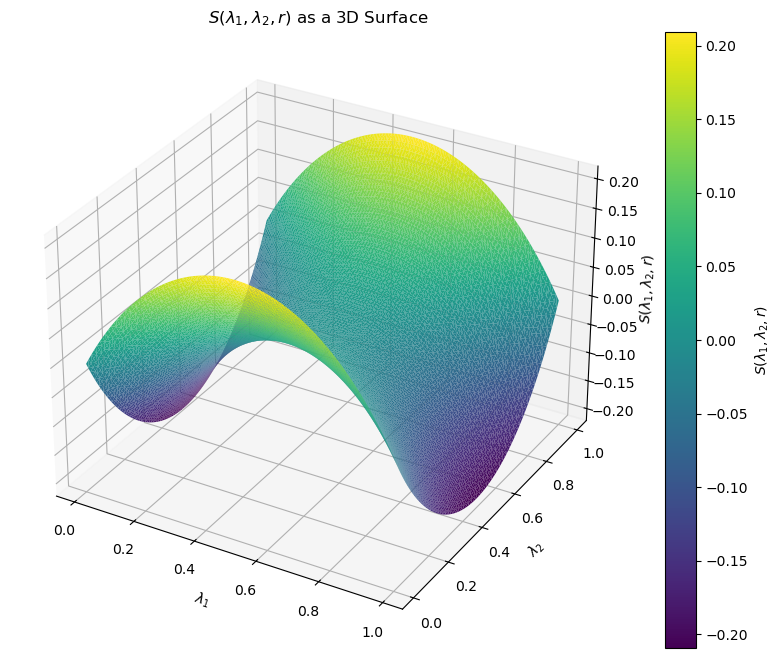

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(lambda_vals, lambda_vals)
# Flatten X and Y into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the 3D surface using Sigma_vals
surf = ax.plot_trisurf(X_flat, Y_flat, S_vals.flatten(), cmap='viridis')

# Set labels and title
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_zlabel(r'$S(\lambda_1, \lambda_2, r)$')
ax.set_title(r'$S(\lambda_1, \lambda_2, r)$ as a 3D Surface')

# Add color bar
fig.colorbar(surf, ax=ax, label=r'$S(\lambda_1, \lambda_2, r)$')
# Save the plot as a PDF file
plt.savefig('3D_surface_plot_S_vals.pdf')
# Show the plot
plt.show()

#### Single code for plotting

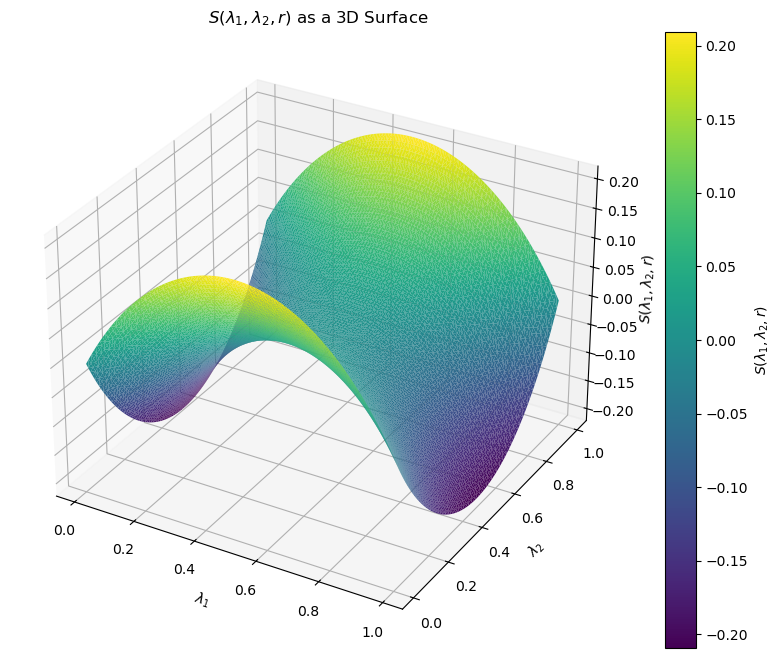

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
def V(lambda_val, r):
    matrix = np.array([[(1 - lambda_val) + lambda_val * np.exp(-2 * r), 0],
                       [0, (1 - lambda_val) + lambda_val * np.exp(2 * r)]])
    return matrix


def delta(lambda_1, lambda_2, alpha):
    #print (alpha)
    return (np.sqrt(lambda_1) - np.sqrt(lambda_2)) * alpha

# Define the function G_lambda
import numpy as np
def acoth(x):
    return 0.5 * np.log((x + 1) / (x - 1))
    
def G(lambda_val):
    J = np.array([[0, 1], [-1, 0]])
    V_lambda = V(lambda_val, r)  # Assuming r = 1
    G_val = 2j * J * acoth(2 * V_lambda * 1j * J)
    return G_val

def Sigma(V1, V2, delta):
    J = np.array([[0, 1], [-1, 0]])
    term1 = np.log(np.linalg.det(V2 + 1j*J/2))
    term2 = np.trace(V1 @ G(2))
    term3 = delta.T @ G(2) @ delta
    result = (term1 + term2 + term3) / (2 * np.log(2))
    return result.real

def S(lambda_1, lambda_2, r):
    V1 = V(lambda_1, r)
    V2 = V(lambda_2, r)
    alpha = np.array([x, y])  # Assuming alpha as [0, 0]
    # # Create alpha as a column vector
    # alpha = np.array([[x], [y]])
    # #alpha
    delta_val = delta(lambda_1, lambda_2, alpha)
    result = -Sigma(V1, V1, np.array([0, 0])) + Sigma(V1, V2, delta_val)
    return result

x = 2
y = 0
alpha = np.array([x, y])

# Generate values for lambda_1 and lambda_2
lambda_vals = np.linspace(0.01, 0.99, 100)
r = 0.5  # Choose an appropriate value for r

# Calculate S(lambda_1, lambda_2, r) for each pair
S_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
for i, lambda_1 in enumerate(lambda_vals):
    for j, lambda_2 in enumerate(lambda_vals):
        S_vals[i, j] = S(lambda_1, lambda_2, r)



# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(lambda_vals, lambda_vals)
# Flatten X and Y into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the 3D surface using Sigma_vals
surf = ax.plot_trisurf(X_flat, Y_flat, S_vals.flatten(), cmap='viridis')

# Set labels and title
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_zlabel(r'$S(\lambda_1, \lambda_2, r)$')
ax.set_title(r'$S(\lambda_1, \lambda_2, r)$ as a 3D Surface')

# Add color bar
fig.colorbar(surf, ax=ax, label=r'$S(\lambda_1, \lambda_2, r)$')
# Save the plot as a PDF file
plt.savefig('3D_surface_plot_S_vals.pdf')
# Show the plot
plt.show()

In [ ]:
for a in range(len(x_allowed_val)):
    # Fixed lambda values
    lambda_1 = 0.1
    lambda_2 = 0.9
    r_val = r_allowed_val[a]  # Choose an appropriate value for r
    x= x_allowed_val[a]
    y= y_allowed_val[a]

    # Calculate Sigma(lambda_1, lambda_2, r) for each pair
    Sigma_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
    for i, lambda_1 in enumerate(lambda_vals):
        for j, lambda_2 in enumerate(lambda_vals):
            V1 = V(lambda_1, r_val)
            V2 = V(lambda_2, r_val)
            alpha = np.array([x, y])  # Assuming alpha as [0, 0]
            delta_val = delta(lambda_1, lambda_2, alpha)
            Sigma_vals[i, j] = Sigma(V1, V2, delta_val)
    
    # Calculate S(lambda_1, lambda_2, r) for each pair
    S_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
    for i, lambda_1 in enumerate(lambda_vals):
        for j, lambda_2 in enumerate(lambda_vals):
            S_vals[i, j] = S(lambda_1, lambda_2, r_val)
    
    # Set up the figure and axes
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(lambda_vals, lambda_vals)
    # Flatten X and Y into 1D arrays
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    
    # Plot the 3D surface using Sigma_vals
    surf = ax.plot_trisurf(X_flat, Y_flat, S_vals.flatten(), cmap='viridis')
    
    # Set labels and title
    ax.set_xlabel(r'$\lambda_1$')
    ax.set_ylabel(r'$\lambda_2$')
    ax.set_zlabel(r'$S(\lambda_1, \lambda_2, r)$')
    ax.set_title(r'$S(\lambda_1, \lambda_2, r)$ as a 3D Surface')
    # Set z-axis limits
    z_min= -0.20
    z_max= +0.20
    ax.set_zlim(z_min, z_max)
    
    # Add color bar
    fig.colorbar(surf, ax=ax, label=r'$S(\lambda_1, \lambda_2, r)$')
    # Ensure color bar uses the same limit
    surf.set_clim(z_min, z_max)

    # Add text annotations for x, y, and r
    ax.text2D(0.05, 0.95, f"x = {x:.2f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.90, f"y = {y:.2f}", transform=ax.transAxes)
    ax.text2D(0.05, 0.85, f"r = {r_val:.2f}", transform=ax.transAxes)
    
    # Save the plot with a dynamic file name
    plt.savefig(f'3D_surface_plot_S_vals_{a}.png')
    #print(f'3D_surface_plot_S_vals_{a}.png')
    # # Show the plot
    # plt.show()

In [ ]:
!  ffmpeg -r 1/2 -i 3D_surface_plot_S_vals_%d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p output.mp4

In [ ]:
import numpy as np

# Generate values for x, y, and N
x_vals = np.linspace(0, 10, 100)
y_vals = np.linspace(0, 10, 100)
N_vals = np.linspace(0, 10, 100)

# Initialize arrays to store r_opt values
r_values = np.zeros((len(x_vals), len(y_vals), len(N_vals)))
x_allowed_val = []
y_allowed_val = []
r_allowed_val = []

for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        for k, N in enumerate(N_vals):
            r_val = N - x**2 - y**2
            if r_val > 0:  # Check if r is positive
                temp = np.arcsinh(np.sqrt(r_val))
                r_values[i, j, k] = temp
                x_allowed_val.append(x)
                y_allowed_val.append(y)
                r_allowed_val.append(temp)
            else:
                r_values[i, j, k] = np.nan  # Set as NaN for non-positive r

print(len(x_allowed_val), len(y_allowed_val), len(r_allowed_val))

In [ ]:
print(len(x_allowed_val), len(y_allowed_val), len(r_allowed_val))

In [ ]:
#np.meshgrid(x_vals, y_vals, N_vals)

To solve $N = x^2 + y^2 + \sinh^2(r)$ for $r$, we can proceed as follows:

First, move all terms involving $r$ to one side of the equation:
$$N - x^2 - y^2 = \sinh^2(r)$$

Next, take the square root of both sides:
$$\sqrt{N - x^2 - y^2} = \sinh(r)$$

Finally, apply the inverse hyperbolic sine function (arcsinh or $\sinh^{-1}$) to both sides:
$$r = \sinh^{-1}\left(\sqrt{N - x^2 - y^2}\right)$$

Therefore, the solution for $r$ is:
$$r = \operatorname{arcsinh}\left(\sqrt{N - x^2 - y^- y^2}\right)$$